In [1]:
from RLSwitch import RLSwitchEnv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from dqn import DQN
from maxWeight import maxWeight
from ppo import PPO
# DQN Implementation
from collections import deque


In [2]:
# Environment Setup
n = 3 # nxn
end_t = 1000
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)

In [3]:
# DQN setup
dqn_agent = DQN(env=env)

In [4]:
trials  = 15hape=(-1, 1))], shuffle=True, epochs=8,
                               verbose=True, callbacks=[tensor_board])
steps = []
for trial in tqdm(range(trials)):
    env.reset() # Reset between each trial
    cur_state = env.state # Get the current state
#     for step in tqdm(range(end_t)): # Till the particular run ends
    for step in range(end_t): # Till the particular run ends
        action = dqn_agent.act(cur_state) # Get the action
#         env.render()
        new_state, reward, done, _ = env.step(action) # Get the rewards
#         print(reward)
        dqn_agent.remember(cur_state, action, 
            reward, new_state, done) # Store the states
        dqn_agent.replay() # Learng
        dqn_agent.target_train() # train target
        cur_state = new_state # set new state
        if done:
            break

KeyboardInterrupt: 

In [5]:
dqn_agent.save_model("models/1stdqn")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/1stdqn/assets


In [6]:
# Environment
n = 3 # nxn
end_t = 1000 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)
# test settings

tests = 10
rewardsDQN = np.zeros((tests,end_t))


for i in tqdm(range(0,tests)):
    env.reset()
    for j in range(0,end_t):
        action = dqn_agent.act(env.state)
        observation, reward, done, info = env.step(action)
        rewardsDQN[i][j] = reward
        if done:
            env.reset()


In [7]:
# Random Environment
n = 3 # nxn
end_t = 1000 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)
# test settings

tests = 10
rewardsRandom = np.zeros((tests,end_t))


for i in tqdm(range(0,tests)):
    env.reset()
    for j in range(0,end_t):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        rewardsRandom[i][j] = reward
        if done:
            env.reset()


In [8]:
# maxWeight Environment
n = 3 # nxn
end_t = 1000 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)
# test settings

tests = 10
rewardsMaxWeight = np.zeros((tests,end_t))

maxWeightAgent = maxWeight(env)

for i in tqdm(range(0,tests)):
    env.reset()
    for j in range(0,end_t):
        action = maxWeightAgent.act()
        observation, reward, done, info = env.step(action)
        rewardsMaxWeight[i][j] = reward
        if done:
            env.reset()


In [ ]:
# Train PPO
n = 3 # nxn
end_t = 1000 # number of time steps to end an episode after
env = RLSwitchEnv(n,end_t, lambdaMatrix = None)
ppo_agent = PPO(env=env)
state = env.reset()

# setup
state_dims = env.observation_space.shape
n_actions = env.action_space.n

dummy_n = np.zeros((1, 1, n_actions))
dummy_1 = np.zeros((1, 1, 1))
target_reached = False

best_reward = 0
iters = 0
max_iters = 50




while not target_reached and iters < max_iters:
    states = []
    actions = []
    values = []
    masks = []
    rewards = []
    actions_probs = []
    actions_onehot = []

    for itr in range(ppo_steps):
        state_input = K.expand_dims(state, 0)
        action_dist = ppo_agent.actor.predict([state_input], steps=1)
        q_value = ppo_agent.critic.predict([state_input], steps=1)
        action = np.random.choice(n_actions, p=action_dist[0, :])
        action_onehot = np.zeros(n_actions)
        action_onehot[action] = 1

        observation, reward, done, info = env.step(action)
                print('itr: ' + str(itr) + ', action=' + str(action) + ', reward=' + str(reward) + ', q val=' + str(q_value))
        mask = not done

        states.append(state)
        actions.append(action)
        actions_onehot.append(action_onehot)
        values.append(q_value)
        masks.append(mask)
        rewards.append(reward)
        actions_probs.append(action_dist)

        state = observation

        if done:
            env.reset()
    
    q_value = ppo_agent.critic.predict(state_input, steps=1)
    values.append(q_value)
    returns, advantages = ppo_agent.get_advantages(values, masks, rewards)
    actor_loss = ppo_agent.actor.fit(
    [states, actions_probs, advantages, 
     np.reshape(rewards, newshape=(-1, 1, 1)), values[:-1]],
    [(np.reshape(actions_onehot,
                 newshape=(-1, n_actions)))], verbose=True, shuffle=True, epochs=8)
    critic_loss = model_critic.fit([states], [np.reshape(returns, newshape=(-1, 1))], 
                                   shuffle=True, epochs=8,verbose=True)

In [9]:
avgRandom = np.average(rewardsRandom,axis=1)
avgDQN = np.average(rewardsDQN,axis=1)
avgmaxWeight = np.average(rewardsMaxWeight,axis=1)

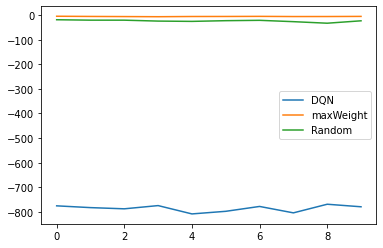

In [10]:
plt.plot(avgDQN)
plt.plot(avgmaxWeight)
plt.plot(avgRandom)
plt.legend(["DQN",'maxWeight','Random'])
plt.show()